# ISLR- Python Ch4 Applied 11

- [Load Auto Dataset](#Load-Auto-Dataset)
- [A. Create a Binary MPG Response Variable](#A.-Create-a-Binary-MPG-Response-Variable)
- [B. Explore Data Graphically](#B.-Explore-Data-Graphically) 
- [C. Split the Data](#C.-Split-the-Data)
- [D. Perform LDA and Evaluate Model](#D.-Perform-LDA-and-Evaluate-Model)
- [E. Perform QDA and Evaluate Model](#D.-Perform-QDA-and-Evaluate-Model)
- [F. Perform Logistic Regression and Evaluate Model](#F.-Perform-Logistic-Regression-and-Evaluate-Model)
- [G. Perform KNN Analysis and Evaluate Model](#G.-Perform-KNN-Analysis-and-Evaluate-Model)

In [2]:
## perform imports and set-up
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from scipy import stats

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

## Load Auto Dataset

In [3]:
df = pd.read_csv('../../../data/Auto.csv',na_values='?')
df = df.dropna()
len(df)

392

## A. Create a Binary MPG Response Variable

We will create a binary MPG response called MPG01 as follows, we will calculate the median of the MPG variable. For instances of MPG < median(MPG) MPG01=0 and for values of MPG > median(MPG) MPG01=1.

In [4]:
print('The median mpg is', df.mpg.median())
print('There are', len(df), 'instances')

df['MPG01'] = df.mpg > df.mpg.median()
df.head()

The median mpg is 22.75
There are 392 instances


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,MPG01
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,False
1,15,8,350,165,3693,11.5,70,1,buick skylark 320,False
2,18,8,318,150,3436,11.0,70,1,plymouth satellite,False
3,16,8,304,150,3433,12.0,70,1,amc rebel sst,False
4,17,8,302,140,3449,10.5,70,1,ford torino,False


## B. Explore Data Graphically

We will explore the relationship of the predictors to MPG01. We will do this in two stages. First, we will look at scatterplots of all the predictors since the number of predictors is relatively low. Then we can zoom in on the relationship between specific predictors and the response using boxplots which are useful to plot responses over different categories.

### Scatterplots

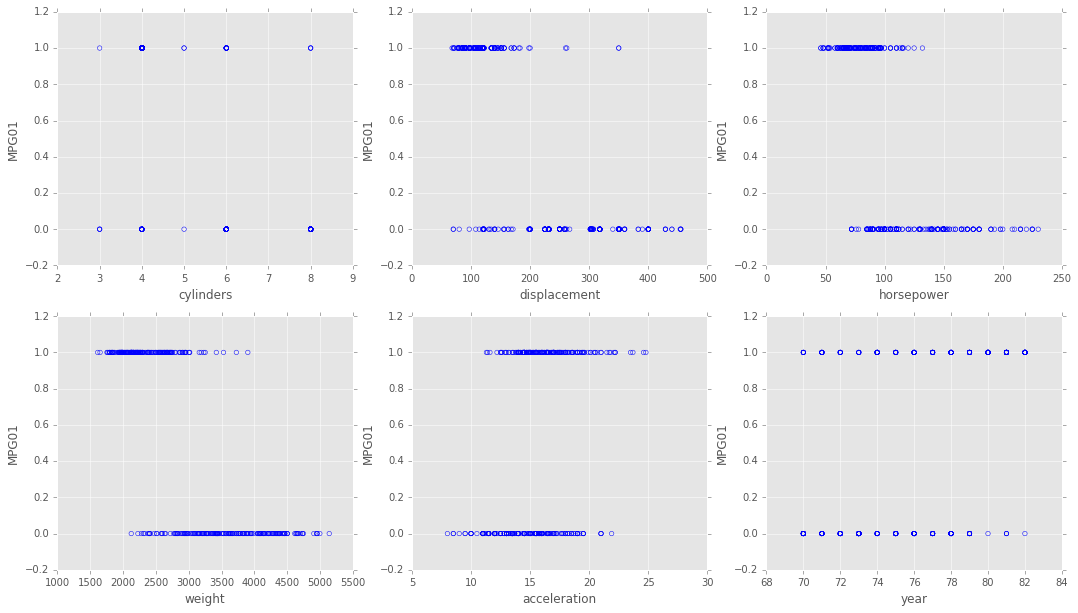

In [5]:
# make a scatter matrix, we will not use the mpg, or origin columns
predictors = df.columns[1:7]
fig, axarr = plt.subplots(2,3,figsize=(18,10))

indices = np.unravel_index(np.arange(0,6),(2,3)) # ([0 0 0 1 1 1],[0,1,2,0,1,2])
indices = list(zip(indices[0],indices[1]))

for _, (index, predictor) in enumerate(zip(indices, predictors)):
    axarr[index].scatter(df[predictor].values, df['MPG01'].values, facecolors='none', edgecolors='b')
    axarr[index].set_xlabel(predictor)
    axarr[index].set_ylabel('MPG01')


### Boxplots

From the above scatterplots, the variables horsepower, weight and acceleration seem to be useful in predicting MPG01. Lets take a look at these in box-plots. 

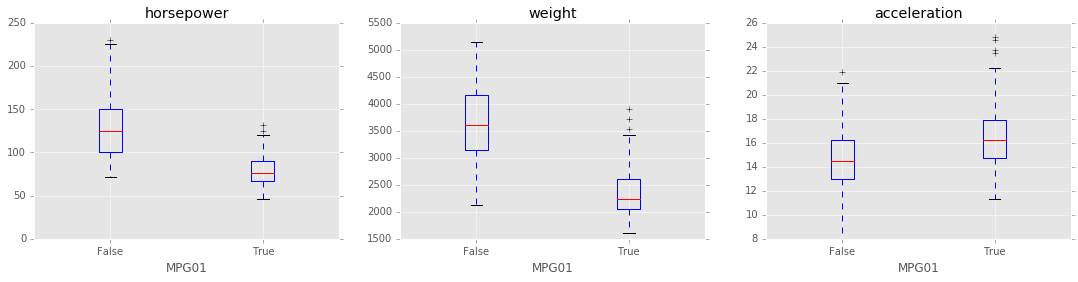

In [6]:
# Construct box plots grouped by MPG01
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
df.boxplot(['horsepower'], by='MPG01', ax=ax1);
df.boxplot(['weight'],by='MPG01',ax=ax2);
df.boxplot(['acceleration'], by='MPG01', ax=ax3);
fig.suptitle(''); # remove pandas auto title

The medians of the horsepower, weight and acceleration are different between the classes of cars with mpg > or < Median(mpg), although we would need to perform a hypothesis test to see if they are significantly different. These variables are the ones that we will use to classify auto data with.

## C. Split the Data

We will now split the data into a test set and a training set. Pandas provides a samplimng method for a dataframe.

In [7]:
# select 300 random samples from dataframe for training
num_samples = 300
df_train = df.sample(frac=num_samples/len(df))
# The remainder 97 will be held out for testing
df_test = df.sample(frac=1-num_samples/len(df))

## D. Perform LDA and Evaluate Model

In [8]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['horsepower', 'weight', 'acceleration']
X_train =  df_train[predictors].values
y_train = df_train['MPG01'].values

X_test = df_test[predictors].values
y_test = df_test['MPG01'].values

# Build LDA Classifier and Fit #
################################
lda_clf = LDA(solver='lsqr',store_covariance=True)
lda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])
print('Coeffecients =', lda_clf.coef_)

# Predict Test Data and Evaluate #
##################################
y_predicted = lda_clf.predict(X_test)
print('\n **The error rate of the LDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))


Class Priors = [ 0.5033  0.4967]
Class Means = [  129.7417  3645.4834    14.6179] [   78.3624  2338.0738    16.5973]
Coeffecients = [[ 0.0154 -0.0047  0.1357]]

 **The error rate of the LDA model is 13.04%** 


## E. Perform QDA and Evaluate Model

In [9]:
# Build LDA Classifier and Fit #
################################
qda_clf = QDA()
qda_clf.fit(X_train,y_train)

print('Class Priors =', lda_clf.priors_)
print('Class Means =', lda_clf.means_[0], lda_clf.means_[1])

# Predict Test Data and Evaluate #
##################################
y_predicted = qda_clf.predict(X_test)
print('\n **The error rate of the QDA model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Class Priors = [ 0.5033  0.4967]
Class Means = [  129.7417  3645.4834    14.6179] [   78.3624  2338.0738    16.5973]

 **The error rate of the QDA model is 11.96%** 


## F. Perform Logistic Regression and Evaluate Model

In [10]:
# Get Training/Test Predictors and Responses #
##############################################
X_train = sm.add_constant(df_train[predictors])
X_test = sm.add_constant(df_test[predictors])

# Create Model, Fit and Evaluate #
##################################
logit = sm.Logit(y_train, X_train)
results = logit.fit()
print('\n', results.summary()) 
# interestingly, the acceleration variable is not significant, it is likely correlated with another variable
print('\n Correlations = \n' , df_train[predictors].corr())
print('\n The acceleration variable is strongly correlated with horsepower')

# Predict Test Data and Evaluate #
##################################
test_predictions = results.predict(X_test)
y_predicted = np.array(test_predictions > 0.5, dtype=bool)
print('\n **The error rate of the LOGISTIC model is {0:.2f}%** '.format(100*np.mean(y_predicted!=y_test)))

Optimization terminated successfully.
         Current function value: 0.261839
         Iterations 9

                            Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  300
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            3
Date:                Mon, 18 Jul 2016   Pseudo R-squ.:                  0.6222
Time:                        14:22:58   Log-Likelihood:                -78.552
converged:                       True   LL-Null:                       -207.94
                                        LLR p-value:                 8.289e-56
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const           11.6415      2.925      3.980      0.000         5.908    17.375
horsepower      -0.01

## G. Perform KNN Analysis and Evaluate Model

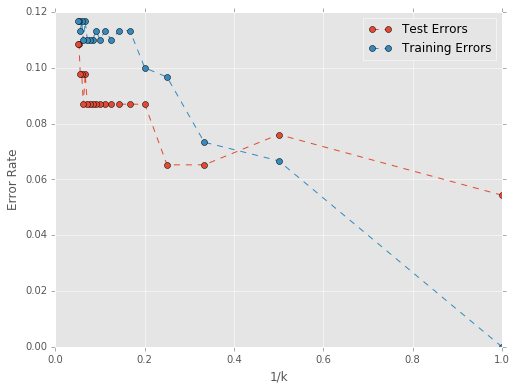

In [11]:
# Get Training/Test Predictors and Responses #
##############################################
predictors = ['horsepower', 'weight', 'acceleration']
X_train =  df_train[predictors].values
y_train = df_train['MPG01'].values

X_test = df_test[predictors].values
y_test = df_test['MPG01'].values

# make arrays to hold training/test error rates for each of the  k-values between 1 and 20
train_error_rate = np.zeros(20)
test_error_rate = np.zeros(20)
k_values = np.arange(1,21)

# Build 20 KNN classifiers varying k between 1 and 20 and evaluate the model's performance
for idx, k in enumerate(k_values):
    # Construct a KNN classifier and fit
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    # use the model on the training data to get training error rate
    y_train_predicted = knn.predict(X_train)
    # compute the training error rate for this k-value
    train_error_rate[idx] = np.mean(y_train_predicted!=y_train)
    
    # Use the model on the held out test data
    y_test_predicted = knn.predict(X_test)
    # compute the error rate for this k-value
    test_error_rate[idx] = np.mean(y_test_predicted!=y_test)
    
# Plot Train and Test Error Rate
fig, ax = plt.subplots(figsize=(8,6))
inverse_k = 1/k_values
ax.plot(inverse_k, test_error_rate, linestyle='--', marker='o', label='Test Errors');
ax.plot(inverse_k, train_error_rate,linestyle='--', marker='o', label='Training Errors')
ax.set_xlabel('1/k')
ax.set_ylabel('Error Rate')
plt.legend(loc='best');

The lowest testing errror rate occurs for the k=1 model and has an error of ~5.5%. So on this data set KNN outperforms the other models.